Analysing Netflix TV Show Trends: Maturity Rating

This notebook will look into the maturity ratings of Netflix TV shows and its evolution since Netflix became a streaming service in 2007. As well as defining the different categories, this notebook will also analyse the trends of maturity ratings, popularity of shows based on maturity ratings as well as its correlations with genres, imdb scores and audience demographics.

In [26]:
# Import Modules/Dependancies
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.stats import chi2_contingency

In [2]:
# Read CSV File
netflix_shows = pd.read_csv("Resources/netflix_shows.csv")

# Display DataFrame
netflix_shows.head()

,title,release_year,age_certification,runtime,language,genres,production_countries,seasons,imdb_score,imdb_votes
0,Monty Python's Flying Circus,1969,TV-14,30,"English, Arabic, French, German, Italian, Mand...","['comedy', 'european']",['GB'],4.0,8.8,72895.0
1,Monty Python's Fliegender Zirkus,1972,TV-MA,43,"English, German",['comedy'],[],1.0,8.1,2144.0
2,Seinfeld,1989,TV-PG,24,English,['comedy'],['US'],9.0,8.9,302700.0
3,Knight Rider,1982,TV-PG,51,English,"['action', 'scifi', 'crime', 'drama']",['US'],4.0,6.9,33760.0
4,Thomas & Friends,1984,TV-Y,10,"Spanish, French, Chinese, Japanese, English","['family', 'comedy', 'music', 'action', 'anima...",['GB'],24.0,6.5,4948.0


In [4]:
# Filter DataFrame from 2007 
netflix_years = netflix_shows[(netflix_shows['release_year'] >= 2007)].dropna().reset_index(drop=True)

# Display filtered DataFrame
netflix_years.head()

,title,release_year,age_certification,runtime,language,genres,production_countries,seasons,imdb_score,imdb_votes
0,Breaking Bad,2008,TV-MA,48,"English, Spanish","['drama', 'thriller', 'crime']",['US'],5.0,9.5,1727694.0
1,The Walking Dead,2010,TV-MA,46,English,"['action', 'drama', 'scifi', 'thriller', 'horr...",['US'],11.0,8.2,945125.0
2,Downton Abbey,2010,TV-14,58,English,"['drama', 'romance', 'european']",['GB'],6.0,8.7,197744.0
3,The Great British Baking Show,2010,TV-PG,57,English,"['reality', 'european']",['GB'],12.0,8.6,9564.0
4,Community,2009,TV-PG,23,English,['comedy'],['US'],6.0,8.5,252564.0


## Analyze Maturity Ratings Over Time

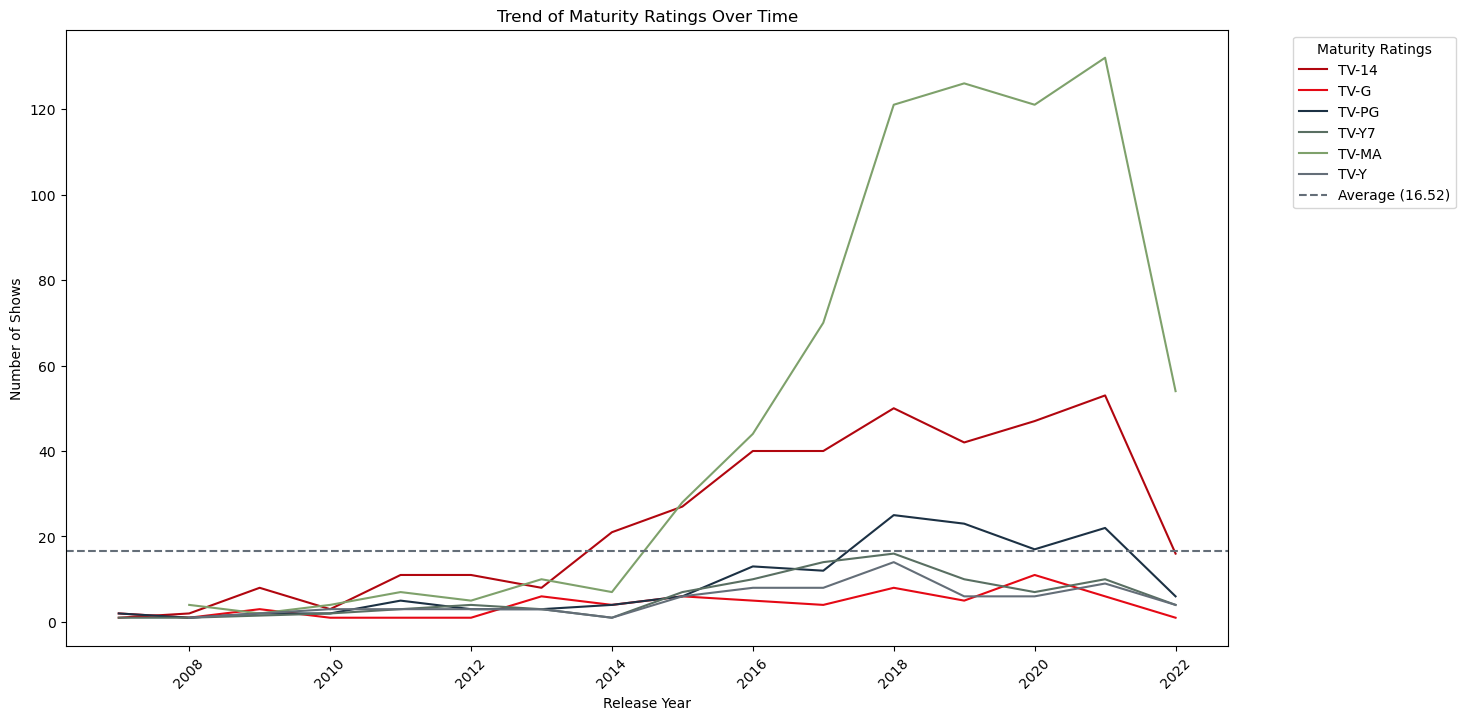

In [9]:
# Count the number of shows per maturity rating for each year and calculate overall average
maturity_trends = netflix_years.groupby(['release_year', 'age_certification']).size().reset_index(name='count')
overall_avg_maturity = maturity_trends['count'].mean()

# Plotting the trend of maturity ratings over time with an average line
plt.figure(figsize=(15, 8))
sns.lineplot(data=maturity_trends, x="release_year", y="count", hue="age_certification", palette=['#B1060F', '#E50915', '#1C3144', '#596F62', '#7EA16B', '#646E78'])
plt.title('Trend of Maturity Ratings Over Time')
plt.xlabel('Release Year')
plt.ylabel('Number of Shows')
plt.axhline(y=overall_avg_maturity, color='#646E78', linestyle='--', label=f'Average ({overall_avg_maturity:.2f})')
plt.legend(title='Maturity Ratings', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.savefig ("Images/04_1_Maturity_Ratings_Over_Time.png")
plt.show()


## Maturity Ratings vs IMDb Score

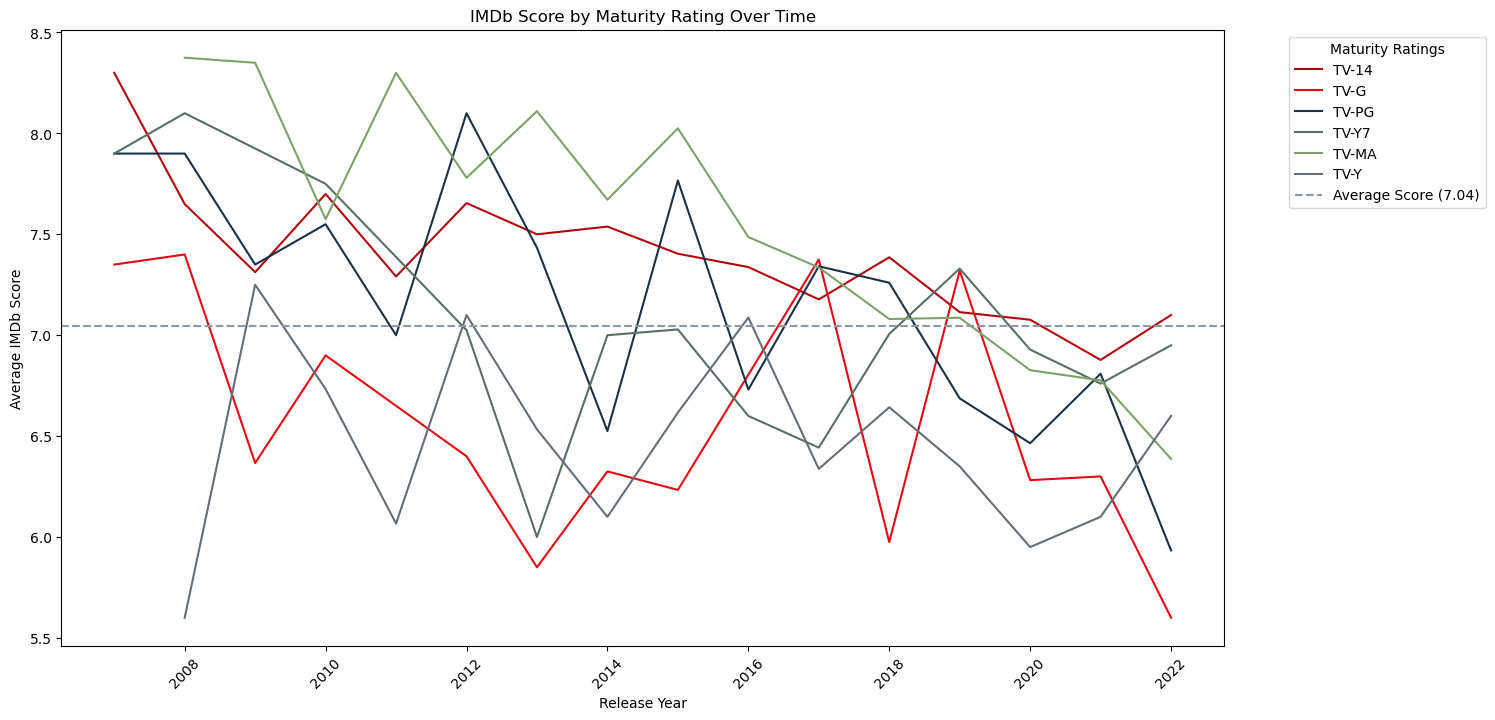

In [13]:
# Calculate the average IMDb score for each maturity rating per year and overall average
avg_imdb_score_by_rating = netflix_years.groupby(['release_year', 'age_certification'])['imdb_score'].mean().reset_index()
overall_avg_score = avg_imdb_score_by_rating['imdb_score'].mean()

# Plotting IMDb scores by maturity rating over time with an average line
plt.figure(figsize=(15, 8))
sns.lineplot(data=avg_imdb_score_by_rating, x="release_year", y="imdb_score", hue="age_certification", palette=['#B1060F', '#E50915', '#1C3144', '#596F62', '#7EA16B', '#646E78'])
plt.title('IMDb Score by Maturity Rating Over Time')
plt.xlabel('Release Year')
plt.ylabel('Average IMDb Score')
plt.axhline(y=overall_avg_score, color='#8D98A7', linestyle='--', label=f'Average Score ({overall_avg_score:.2f})')
plt.legend(title='Maturity Ratings', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.savefig("Images/04_2_IMDB_Score_by_Maturity_Rating.png")
plt.show()


## Maturity Ratings vs IMDb Votes

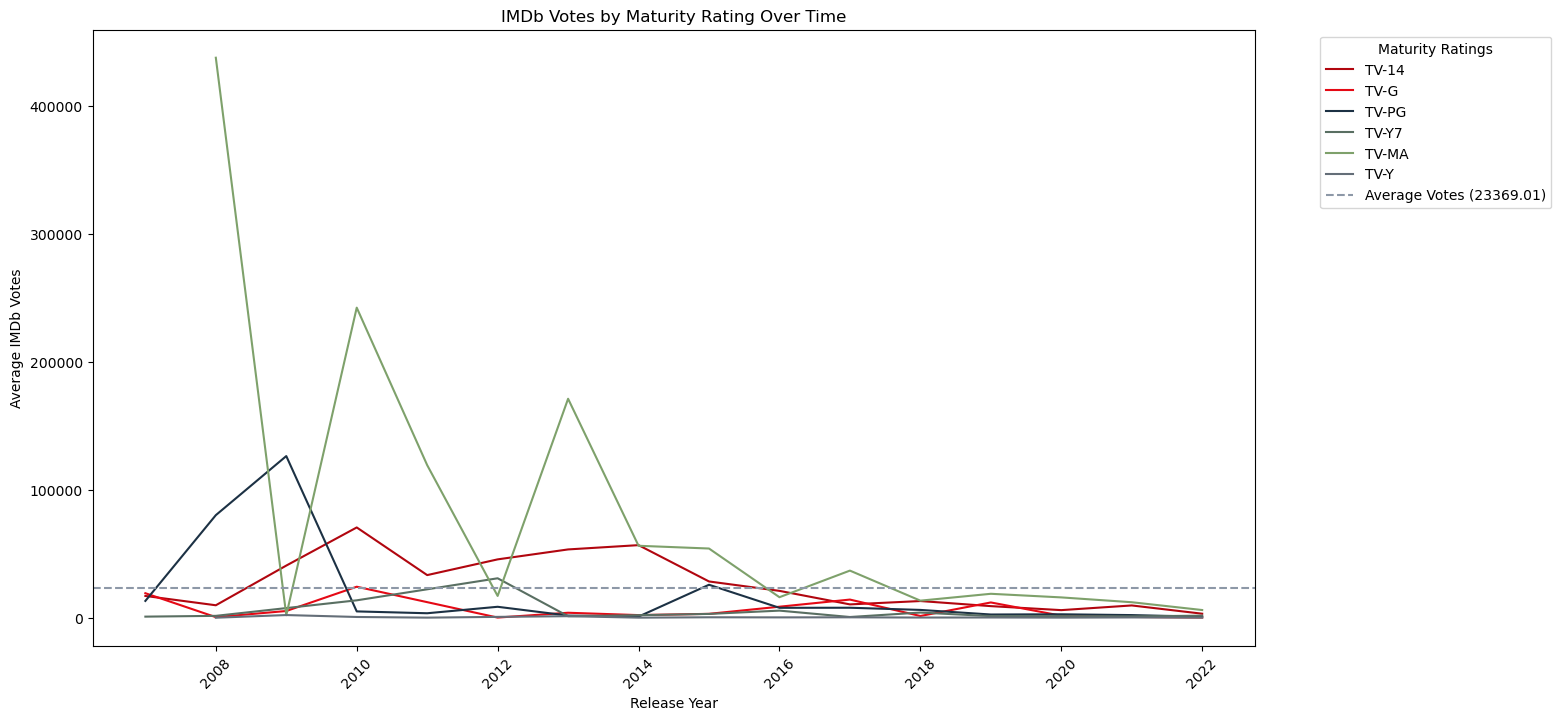

In [16]:
# Calculate the average IMDb votes for each maturity rating per year and overall average
avg_imdb_votes_by_rating = netflix_years.groupby(['release_year', 'age_certification'])['imdb_votes'].mean().reset_index()
overall_avg_votes = avg_imdb_votes_by_rating['imdb_votes'].mean()

# Plotting IMDb votes by maturity rating over time with an average line
plt.figure(figsize=(15, 8))
sns.lineplot(data=avg_imdb_votes_by_rating, x="release_year", y="imdb_votes", hue="age_certification", palette=['#B1060F', '#E50915', '#1C3144', '#596F62', '#7EA16B', '#646E78'])
plt.title('IMDb Votes by Maturity Rating Over Time')
plt.xlabel('Release Year')
plt.ylabel('Average IMDb Votes')
plt.axhline(y=overall_avg_votes, color='#8D98A7', linestyle='--', label=f'Average Votes ({overall_avg_votes:.2f})')
plt.legend(title='Maturity Ratings', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.savefig("Images/04_3_IMDB_Votes_By_Maturity_Rating.png")
plt.show()


## Heatmaps for IMDb Scores and Votes by Maturity Rating

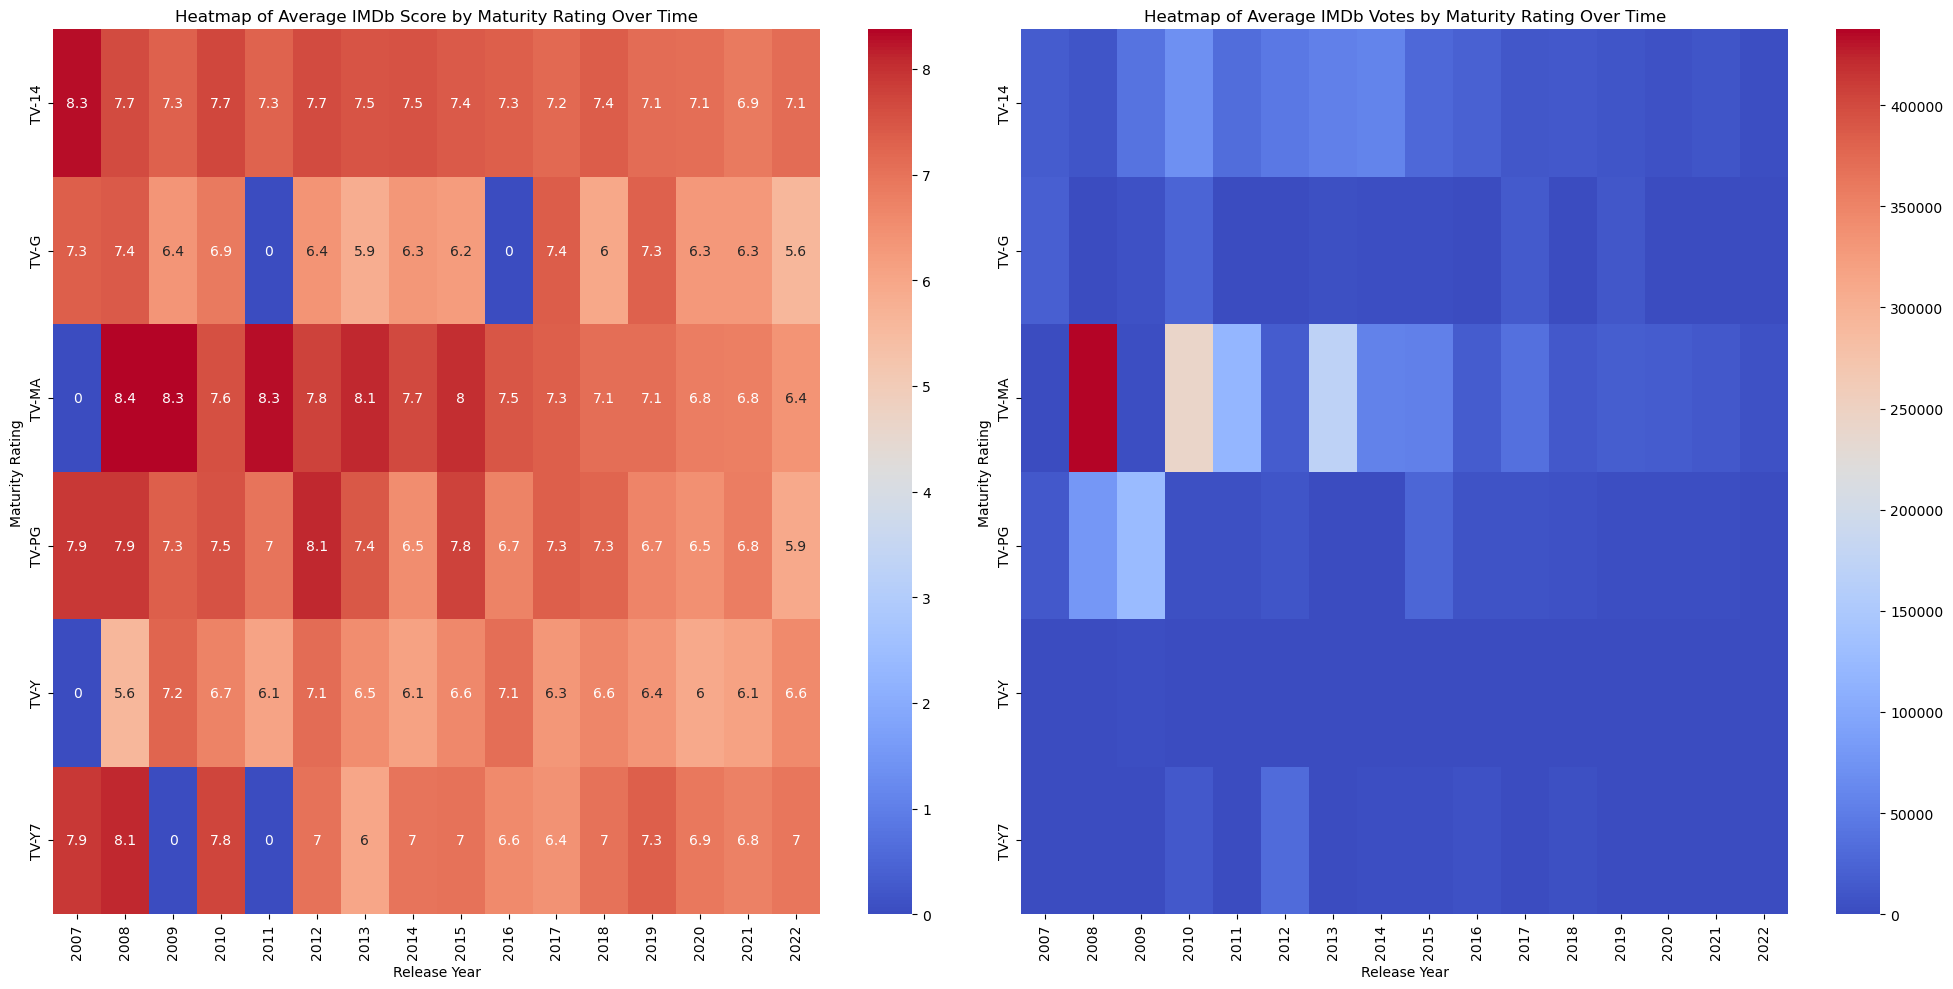

In [20]:
# Prepare data for heatmaps
heatmap_data_score = avg_imdb_score_by_rating.pivot(index="age_certification", columns="release_year", values="imdb_score").fillna(0)
heatmap_data_votes = avg_imdb_votes_by_rating.pivot(index="age_certification", columns="release_year", values="imdb_votes").fillna(0)

# Plotting the heatmaps
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
sns.heatmap(heatmap_data_score, cmap="coolwarm", annot=True)
plt.title('Heatmap of Average IMDb Score by Maturity Rating Over Time')
plt.ylabel('Maturity Rating')
plt.xlabel('Release Year')

plt.subplot(1, 2, 2)
sns.heatmap(heatmap_data_votes, cmap="coolwarm")
plt.title('Heatmap of Average IMDb Votes by Maturity Rating Over Time')
plt.ylabel('Maturity Rating')
plt.xlabel('Release Year')

plt.tight_layout()
plt.savefig("Images/04_4_Heatmaps_Score_Votes_Maturity.png")
plt.show()


## Statistical Tests

In [22]:
# Creating a contingency table of years and maturity ratings
contingency_table = pd.crosstab(netflix_years['release_year'], netflix_years['age_certification'])

# Performing the Chi-Square Test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Interpreting the results
print("Chi-Square value:", chi2)
print("P-value:", p)


Chi-Square value: 189.48238345712838
P-value: 7.109140923397129e-12


Even though the test shows a significant relationship between maturity ratings and time, since maturity ratings is an oridnal variable, this must be intrepreted with caution. 

In [31]:
# Calculate correlation between IMDb score, votes, and maturity ratings
netflix_years['age_certification_numeric'] = netflix_years['age_certification'].astype('category').cat.codes
correlation_data = netflix_years[['age_certification_numeric', 'imdb_score', 'imdb_votes']]
correlation_matrix = correlation_data.corr()
correlation_matrix

,age_certification_numeric,imdb_score,imdb_votes
age_certification_numeric,1.000000,-0.120774,-0.026375
imdb_score,-0.120774,1.000000,0.242315
imdb_votes,-0.026375,0.242315,1.000000


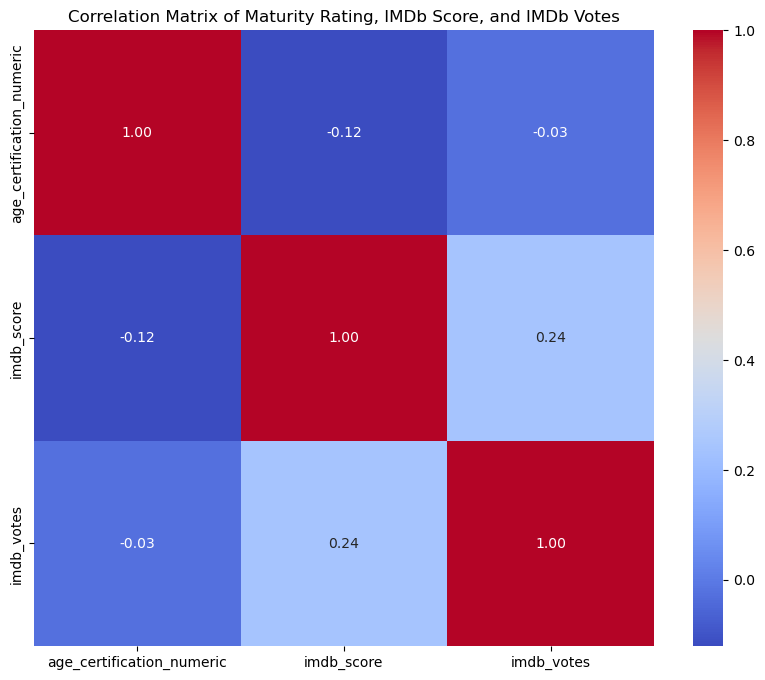

In [33]:
# Heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Maturity Rating, IMDb Score, and IMDb Votes")
plt.savefig("Images/04_5_Correlation_Matrix.png")
plt.show()